In [1]:
import numpy as np

In [2]:
year = np.array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
population = np.array([92228496, 
                      106021537,
                      123202624,
                      132164569,
                      151325798,
                      179323175,
                      203211926,
                      226545805,
                      248709873,
                      281421906])

def modify(in_):
    return ((in_ - 1955) / 45.0)

year = modify(year)

In [3]:
def dot_product_1(i, j, array):
    current_sum = 0.0;
    
    for k in range(0, array.size):
        current_sum += array[k]**i * array[k]**j
    
    return current_sum

def dot_product_1_for_y(i, first_array, second_array):
    current_sum = 0.0;
    
    for k in range(0, first_array.size):
        current_sum += first_array[k]**i * second_array[k]
    
    return current_sum

In [4]:
N = 4

In [5]:
A = np.empty([N + 1, N + 1])

In [6]:
for i in range(0, N + 1):
    for j in range(0, N + 1):
        A[i][j] = dot_product_1(i, j, year)

In [7]:
A

array([[  1.00000000e+01,   3.33066907e-16,   4.07407407e+00,
         -2.22044605e-16,   2.94741655e+00],
       [  3.33066907e-16,   4.07407407e+00,  -2.22044605e-16,
          2.94741655e+00,   0.00000000e+00],
       [  4.07407407e+00,  -2.22044605e-16,   2.94741655e+00,
          0.00000000e+00,   2.50430433e+00],
       [ -2.22044605e-16,   2.94741655e+00,   0.00000000e+00,
          2.50430433e+00,   0.00000000e+00],
       [  2.94741655e+00,   0.00000000e+00,   2.50430433e+00,
          0.00000000e+00,   2.28629303e+00]])

In [8]:
right_part = np.empty([N + 1])

In [9]:
for i in range(0, N + 1):
    right_part[i] = dot_product_1_for_y(i, year, population)

In [10]:
right_part

array([  1.74415571e+09,   3.84379377e+08,   7.37534195e+08,
         2.76719162e+08,   5.40972309e+08])

In [11]:
Answer = np.linalg.inv(A).dot(right_part)

In [12]:
answer_for_initial_x = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
for i in range(0, N + 1):
    answer_for_initial_x += Answer[i] * year ** i

In [13]:
answer_for_initial_x

array([  9.30679111e+07,   1.05341043e+08,   1.19482661e+08,
         1.35946967e+08,   1.54956355e+08,   1.76501416e+08,
         2.00340936e+08,   2.26001897e+08,   2.52779476e+08,
         2.79737046e+08])

In [14]:
population

array([ 92228496, 106021537, 123202624, 132164569, 151325798, 179323175,
       203211926, 226545805, 248709873, 281421906])

In [15]:
def answer(x, answer_for_system):
    current_sum = 0.
    
    for i in range(0, N + 1):
        current_sum += answer_for_system[i] * x ** i
        
    return current_sum

In [16]:
print("Answer for problem: ")
print(answer(modify(2010), Answer))

Answer for problem: 
305706175.5


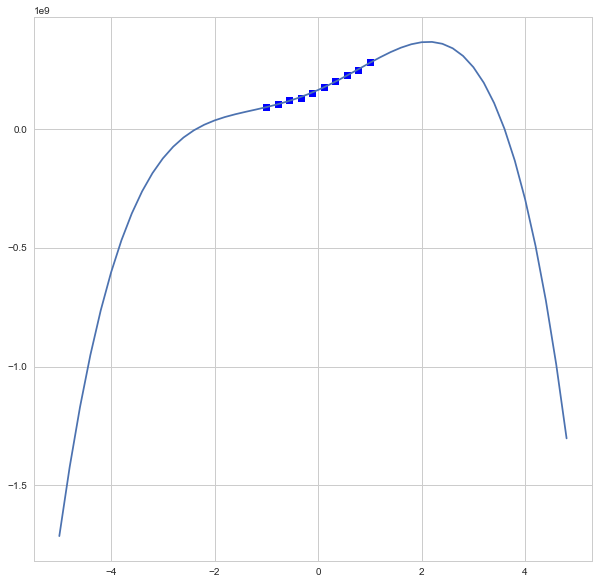

In [17]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(10, 10))
t = np.arange(-5, 5, 0.2)
y = np.array([answer(xi, Answer) for xi in t])

plt.plot(year, population, 'bs')
plt.plot(t, y)
plt.show()